Lead Score Case Study

In [1]:
#Let's First import all the important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Let's now import the Data set to get a grasp on the data

In [4]:
df_lead=pd.read_csv("Leads.csv")

In [5]:
# let's check the data to get an idea about the data

In [6]:
df_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [7]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Here we can see quite a lot of columns have null values,at this point let's not drop any column,let's investigate a little further
#Also it can be noted all the numerical variables and categorigal variables have appropriate data type.

In [9]:
# Now let's check the variation in the numerical variables

In [10]:
df_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [11]:
# the absolute values varies greatly between the variables,so using a scaler is ideal here.

Let's Now Start cleaning the data

In [12]:
# checking for missing values

In [13]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
#let's check the percentage of Null values to get a better idea

In [15]:
round(100*(df_lead.isnull().sum()/len(df_lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
# However there is another problem apart from the null values that is some values in some of the columns are select
#which means they are not real values all though they are not null ,let's see how many such such values are there and replace them with null

In [17]:
df_lead.isin(['Select']).sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
# these 'Select values are equivalent to null values,so let's replace them with null values

In [19]:
df_lead= df_lead.replace('Select', np.nan)

In [20]:
# Now lets check the null value percentages

In [21]:
round(100*(df_lead.isnull().sum()/len(df_lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [22]:
#As we can see a lot of variables have more than 40% missing values they should be dropped right away to avoid any baised observations. 

In [23]:
Null_value_40=df_lead.columns[100*(df_lead.isnull().sum()/len(df_lead)) > 40]

In [24]:
df_lead=df_lead.drop(Null_value_40,axis=1)

In [25]:
df_lead.shape

(9240, 30)

In [26]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [27]:
#let's see what else we can drop

In [28]:
round(100*(df_lead.isnull().sum()/len(df_lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [29]:
# city  and tags altough not having more than 40% null value ,we can still drop it owing to large percentage of missing value
# we can drop them

In [30]:
df_lead=df_lead.drop(['Tags','City'],axis=1)

In [31]:
df_lead.shape

(9240, 28)

In [32]:
round(100*(df_lead.isnull().sum()/len(df_lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [33]:
# now variables such as specialization,What is your current occupation,What matters most to you in choosing a course  will pay an importantant role
#hence they are not dropped ,similarly country plays an important role from marcro economic point of view,hence it is also not drop.

In [34]:
#Let's first start with Speialization

In [35]:
df_lead['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

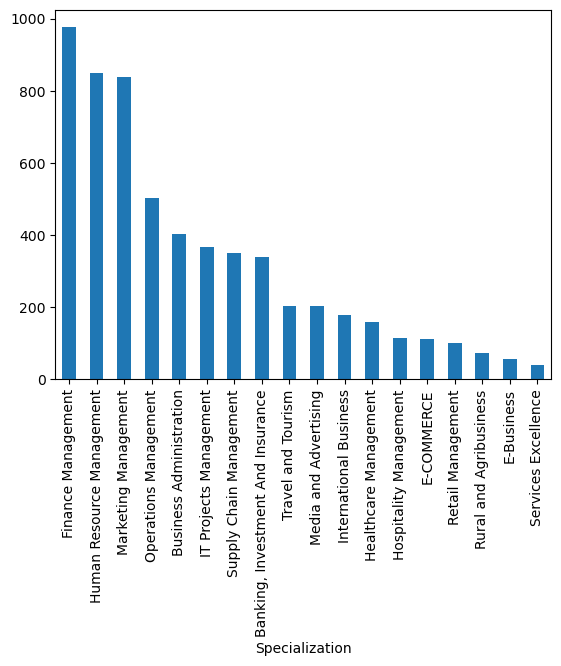

In [36]:
df_lead['Specialization'].value_counts().plot.bar()
plt.show()

In [37]:
#since the missing values are large in number filling them with any particular profession will lead to baises
#so we will filol the missing values with sepecialization as 'General'

In [38]:
df_lead['Specialization'].fillna('General',inplace=True)

In [39]:
# Now let's impute the missing values for 'What is your current occupation' 

In [40]:
df_lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

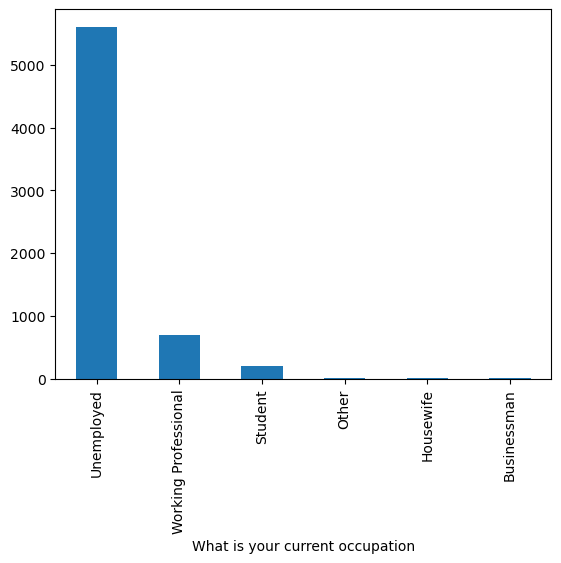

In [41]:
df_lead['What is your current occupation'].value_counts().plot.bar()
plt.show()

In [42]:
#scince the number of missing values are large ,so the best idea is to add them to others as we donot know about them.

In [43]:
df_lead['What is your current occupation'].fillna('Other',inplace=True)

In [44]:
df_lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

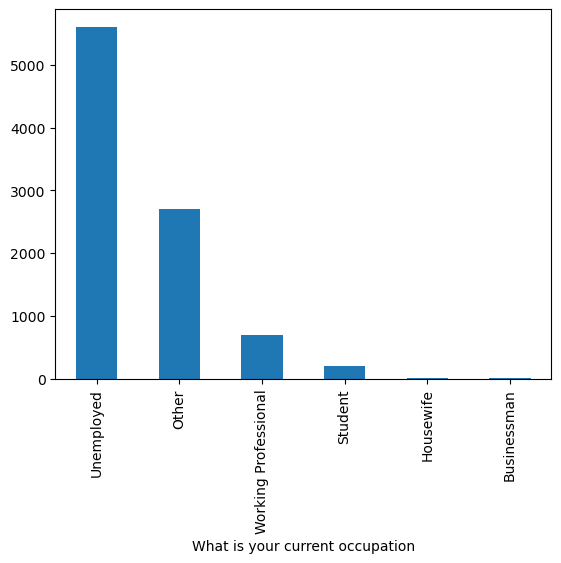

In [45]:
df_lead['What is your current occupation'].value_counts().plot.bar()
plt.show()

In [46]:
#Similarly lets check the values for 'What matters most to you in choosing a course'

In [47]:
df_lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

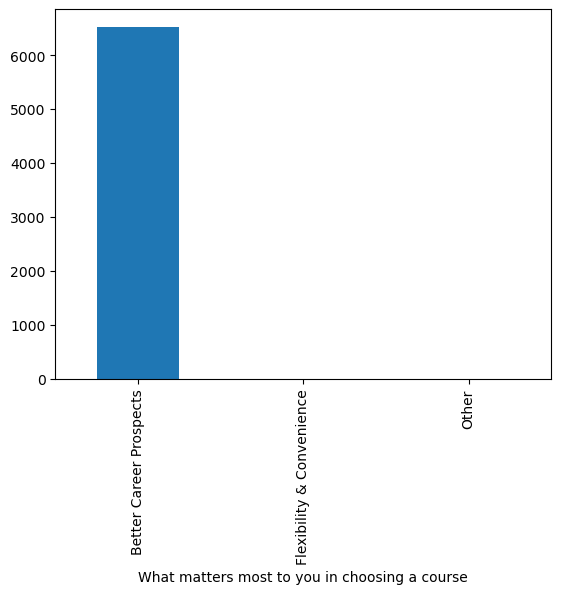

In [48]:
df_lead['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()

In [49]:
#It is clearly evident that 'Better Career Prospects' is the foremost choice among applicants,with negligible other values,so we can safely impute
#the missing values with the same.r if the reason for choosing the course is better career prospect for every one,
#we might well as remove the variable as it would impact our analysis much.

In [50]:
df_lead=df_lead.drop('What matters most to you in choosing a course',axis=1)

In [51]:
# Now let's check out the country column

In [52]:
df_lead['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [53]:
df_lead['Country'].value_counts(normalize=True)

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

In [54]:
# here also we can see that over 95% percent of the applicant are from India ,It would not add any thing substantial
#to our analysis,we better drop the entire column.

In [55]:
df_lead=df_lead.drop('Country',axis=1)

In [56]:
# let's look at our dataframe again to see what else is having null value

In [57]:
df_lead.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

In [58]:
#let's check lead source

In [59]:
df_lead['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [60]:
#let,s replace the two Googles and keep only google

In [61]:
df_lead['Lead Source']=df_lead['Lead Source'].replace('google','Google')

In [62]:
df_lead['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [63]:
#Now let's impute the missing values with most prominent value,That is 'Google'

In [64]:
df_lead['Lead Source'].fillna('Google',inplace=True)

In [65]:
df_lead['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [66]:
# let's now check TotalVisits

In [67]:
df_lead.TotalVisits.value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [68]:
df_lead.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [69]:
df_lead.TotalVisits.quantile([0.90,0.95,0.99])


0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [70]:
# as we can see that the 99 percent applicant have a value less than 17
#where as max is 251,so it's better to impute the missing values with median rather than mean

In [71]:
df_lead['TotalVisits'].fillna(df_lead.TotalVisits.mean(),inplace=True)

In [72]:
df_lead.TotalVisits.isnull().sum()

0

In [73]:
# let's now check for  Last activity

In [74]:
df_lead['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [75]:
#As last activity is unknown,it's better to impute it with 'unreachable'

In [76]:
df_lead['Last Activity'].fillna('Unreachable',inplace=True)

In [77]:
# Now lets for sanity check the null values

In [78]:
df_lead['Last Activity'].isnull().sum()

0

In [79]:
#Now let's check for Page Views Per Visit

In [80]:
df_lead['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [81]:
df_lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [82]:
# the distribution seems even till 75 percentile,so let's impute the null values with median

In [83]:
df_lead['Page Views Per Visit'].fillna(df_lead['Page Views Per Visit'].median(),inplace=True)

In [84]:
# now let's check the data frame once again for missing values 

In [85]:
df_lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [86]:
# let's check what else is irrevalnt to our analysis

In [87]:
# prospect id and lead number can be dropped as they are less significance to our analysis,lets first check ehther they are unique 
#or not

In [88]:
df_lead.shape

(9240, 26)

In [89]:
df_lead.drop_duplicates(subset=None, inplace=True)

In [90]:
df_lead.shape

(9240, 26)

In [91]:
# so there are no duplicates value,let's now drop the columns prospect id and lead number

In [92]:
df_lead=df_lead.drop(['Prospect ID','Lead Number'],axis=1)

In [93]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [94]:
df_lead

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity  \
0                     0.00  Page Visited on Website   
1                     2.50             Email Opened   
2                     2.00             Email Opened   
3                     1.00              Unreachable   
4                     1.00        Converted to Lead   
...                    ...                      ...   
9235                  2.67        Email Marked Spam   
9236                  2.00                 SMS Sent   
9237                  2.00                 SMS Sent   
9238                  3.00                 SMS Sent   
9239                  3.00                 SMS Sent   

                 Specialization  ... X Education Forums Newspaper  \
0                       General  ...                 No        No   
1                       General  ...                 No        No   
2       Business Administration  ...                 No        No   
3         Media and Advertising  ...                 No        No   
4                       General  ...                 No        No   
...                         ...  ...                ...       ...   
9235     IT Projects Management  ...                 No        No   
9236      Media and Advertising  ...                 No        No   
9237    Business Administration  ...                 No        No   
9238  Human Resource Management  ...                 No        No   
9239    Supply Chain Management  ...                 No        No   

     Digital Advertisement Through Recommendations  \
0                       No                      No   
1                       No                      No   
2                       No                      No   
3                       No                      No   
4                       No                      No   
...                    ...                     ...   
9235                    No                      No   
9236                    No                      No   
9237                    No                      No   
9238                    No                      No   
9239                    No                      No   

     Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                        No                                No   
1                                        No                                No   
2             

In [95]:
df_lead['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [96]:
df_lead['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [97]:
df_lead['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [98]:
df_lead['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [99]:
df_lead['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [100]:
df_lead['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [101]:
# although the channel partners are important we can see huge data imbalnce in them,so it's better to drop all of them and some other irrelevant columns

In [102]:
df_lead.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

In [103]:
df_lead

Lead Origin     Lead Source Do Not Email  Converted  \
0                         API      Olark Chat           No          0   
1                         API  Organic Search           No          0   
2     Landing Page Submission  Direct Traffic           No          1   
3     Landing Page Submission  Direct Traffic           No          0   
4     Landing Page Submission          Google           No          1   
...                       ...             ...          ...        ...   
9235  Landing Page Submission  Direct Traffic          Yes          1   
9236  Landing Page Submission  Direct Traffic           No          0   
9237  Landing Page Submission  Direct Traffic          Yes          0   
9238  Landing Page Submission          Google           No          1   
9239  Landing Page Submission  Direct Traffic           No          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0             0.0                            0                  0.00   
1             5.0                          674                  2.50   
2             2.0                         1532                  2.00   
3             1.0                          305                  1.00   
4             2.0                         1428                  1.00   
...           ...                          ...                   ...   
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

                Last Activity             Specialization  \
0     Page Visited on Website                    General   
1                Email Opened                    General   
2                Email Opened    Business Administration   
3                 Unreachable      Media and Advertising   
4           Converted to Lead                    General   
...                       ...                        ...   
9235        Email Marked Spam     IT Projects Management   
9236                 SMS Sent      Media and Advertising   
9237                 SMS Sent    Business Administration   
9238                 SMS Sent  Human Resource Management   
9239                 SMS Sent    Supply Chain Management   

     What is your current occupation I agree to pay the amount through cheque  \
0                         Unemployed                                       No   
1                         Unemployed                                       No   
2                            Student                                       No   
3                         Unemployed                                       No   
4                         Unemployed                                       No   
...                              ...                                      ...   
9235                      Unemployed                                       No   
9236                      Unemployed                                       No   
9237                      Unemployed                                       No   
9238                           Other                                       No   
9239                      Unemployed                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
0                                        No              Modified  
1                                        No          Email Opened  
2                                       Yes          Email Opened  
3                                        No              Modified  
4                                        No              Modified  
...                                     ...                   ...  
9235                                     No     Email Marked Spam  
9236                                  

In [104]:
# now lets check the I agree to pay the amount through cheque column

In [105]:
df_lead['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [106]:
# there is huge data imbalance here,let's drop the column

In [107]:
df_lead.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [108]:
# now let's check A free copy of Mastering The Interview column

In [109]:
df_lead['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [110]:
# this is faily distributed,and is relevant aswell so we won't drop it.

In [111]:
#So That will all as far as dropping of column
#Let's check our final data frame

In [112]:
df_lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  General   
1             Email Opened                  General   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  General   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [113]:
df_lead.shape

(9240, 12)

Now We will Proceed with EDA

In [114]:
# Lets first check the data imbalnce in Target variable

In [115]:
df_lead['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

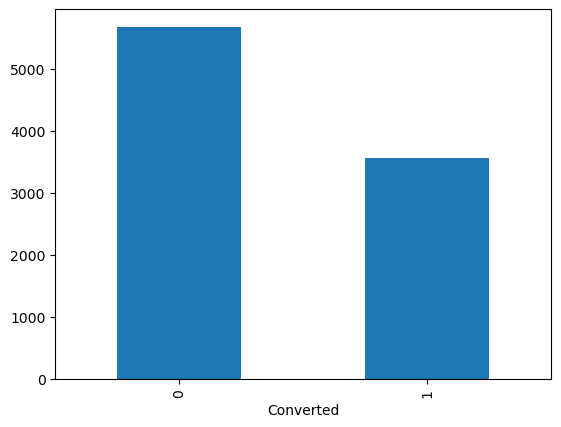

In [116]:
df_lead['Converted'].value_counts().plot.bar()
plt.show()

In [117]:
df_lead['Converted'].value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

In [118]:
#So,coversion rate is close to 40 percent and the data is balanced

In [119]:
#let's proceed with univariate analysis of the Categorical variables

In [120]:
#let's start with lead origin

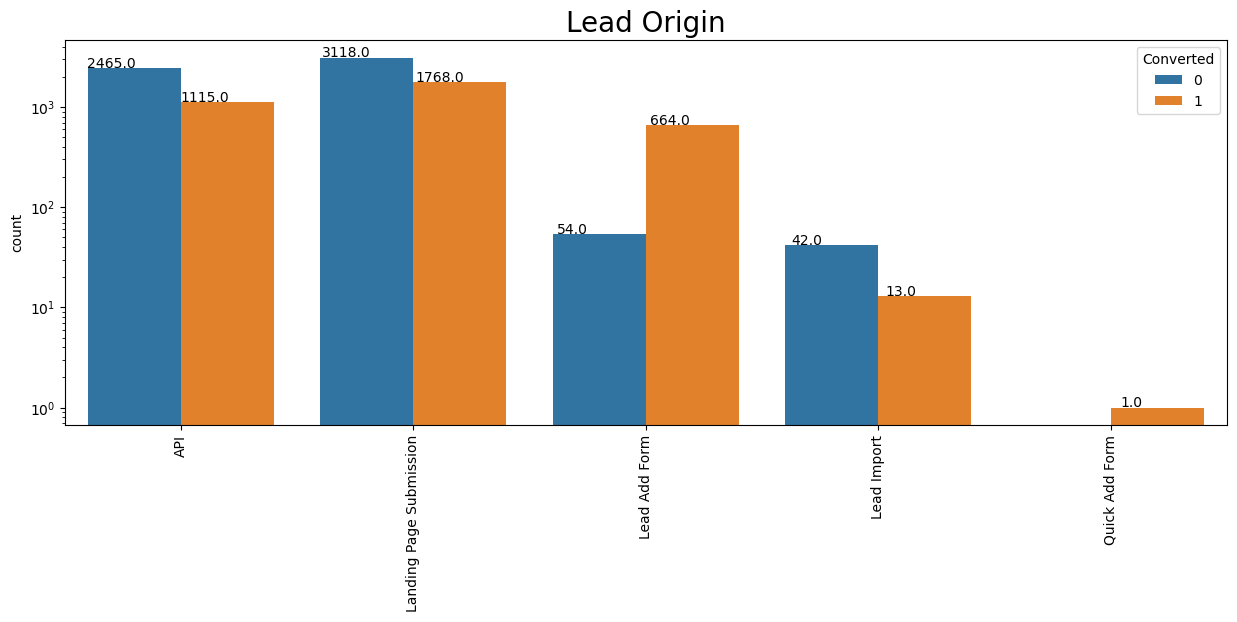

In [121]:
plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

In [122]:
# lead Add form has the highest sucess rate ,so the numbers here should be increased
#API and Landing Page submission has lower conversion rate ,however higher count so,sttratigies should devised to improve conversion rate.
#Lead import and Quick Add form has significantly low number and doesnot help much in analysis.

In [123]:
#Now lets check for lead source

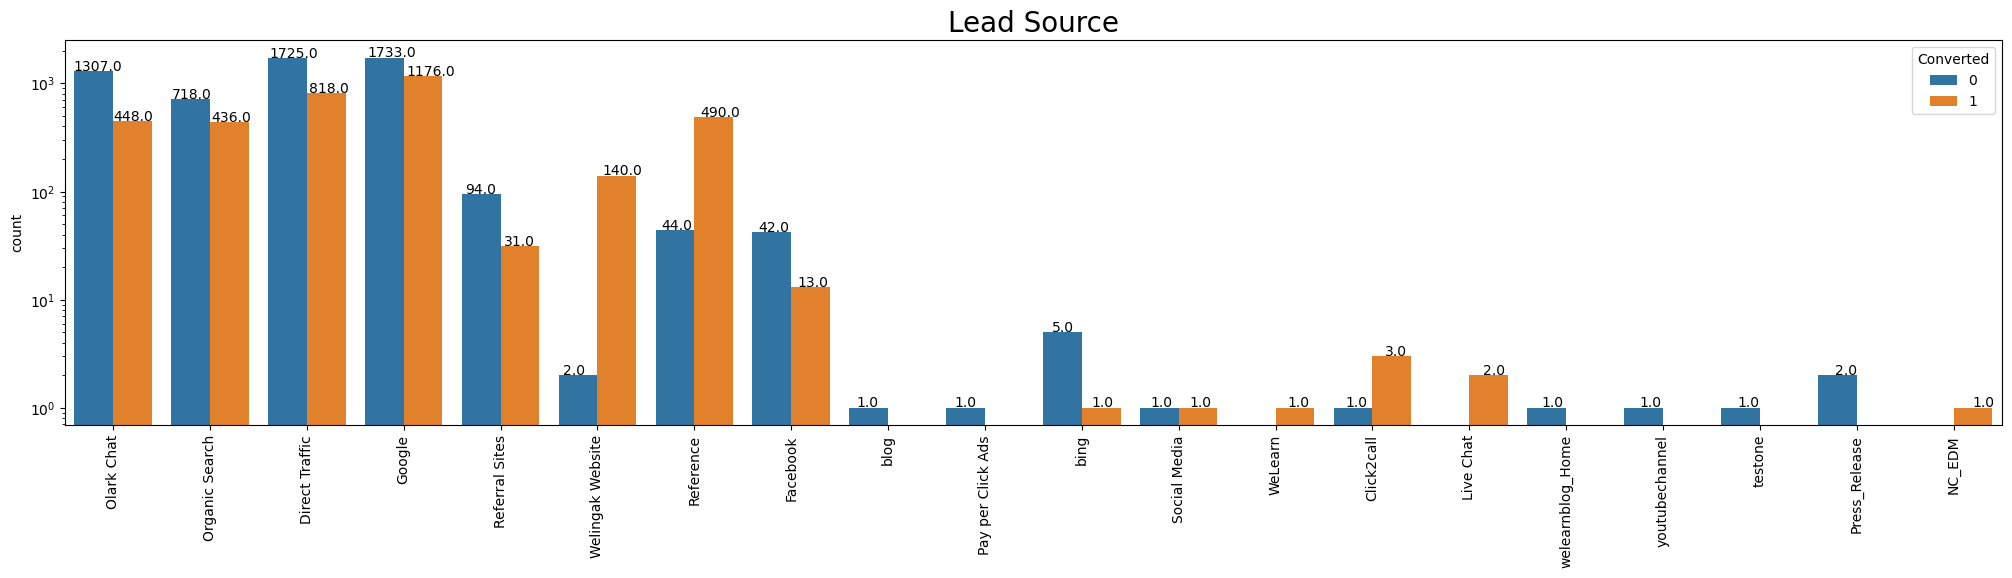

In [124]:
plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [125]:
#Google and direct Traffic generate maximum traffic
#Conversion rate of 'Reference' and 'Welingak Website' leads is high
#Incentivise Reference and Welingak Website to increase traffic
#stragise to increase conversion rates on Google and Direct Traffic
#Donot waste advertising budget on lower traffic and lower conversion platforms such as bing 

In [126]:
# Now let's check Do not email column

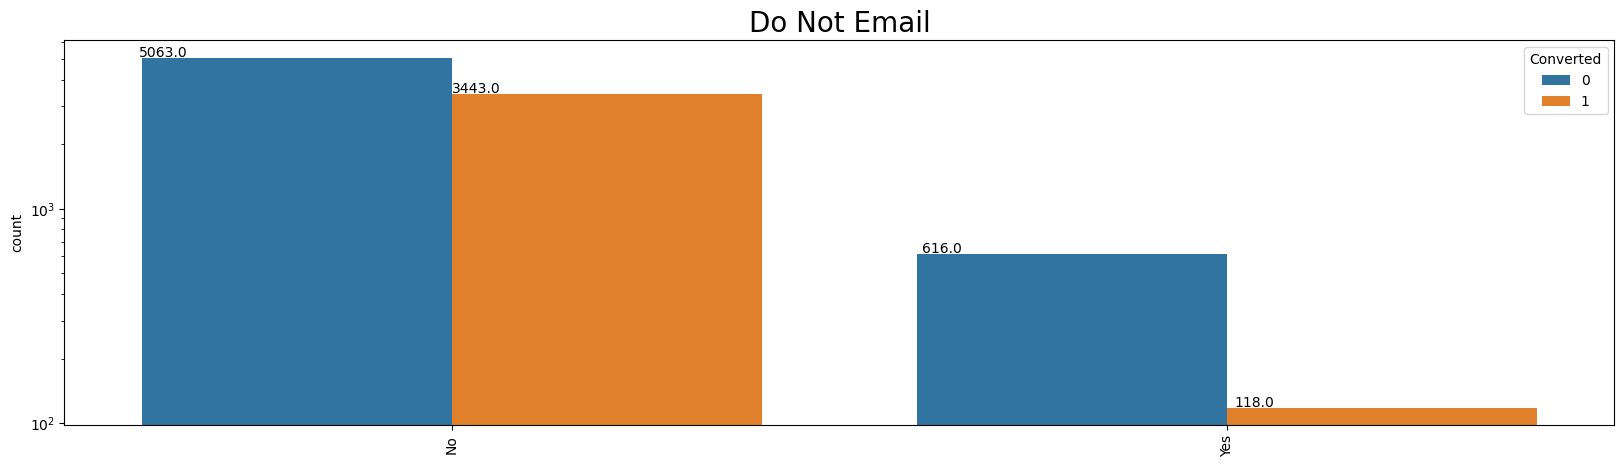

In [127]:
plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [128]:
# people who wants to emailde have a better conversion rate and those who doesnot,has vey low conversion rate
#focus on people who wants to be emailed so that the leads are converted at higher rate.

In [129]:
#Now let's check the last activity column

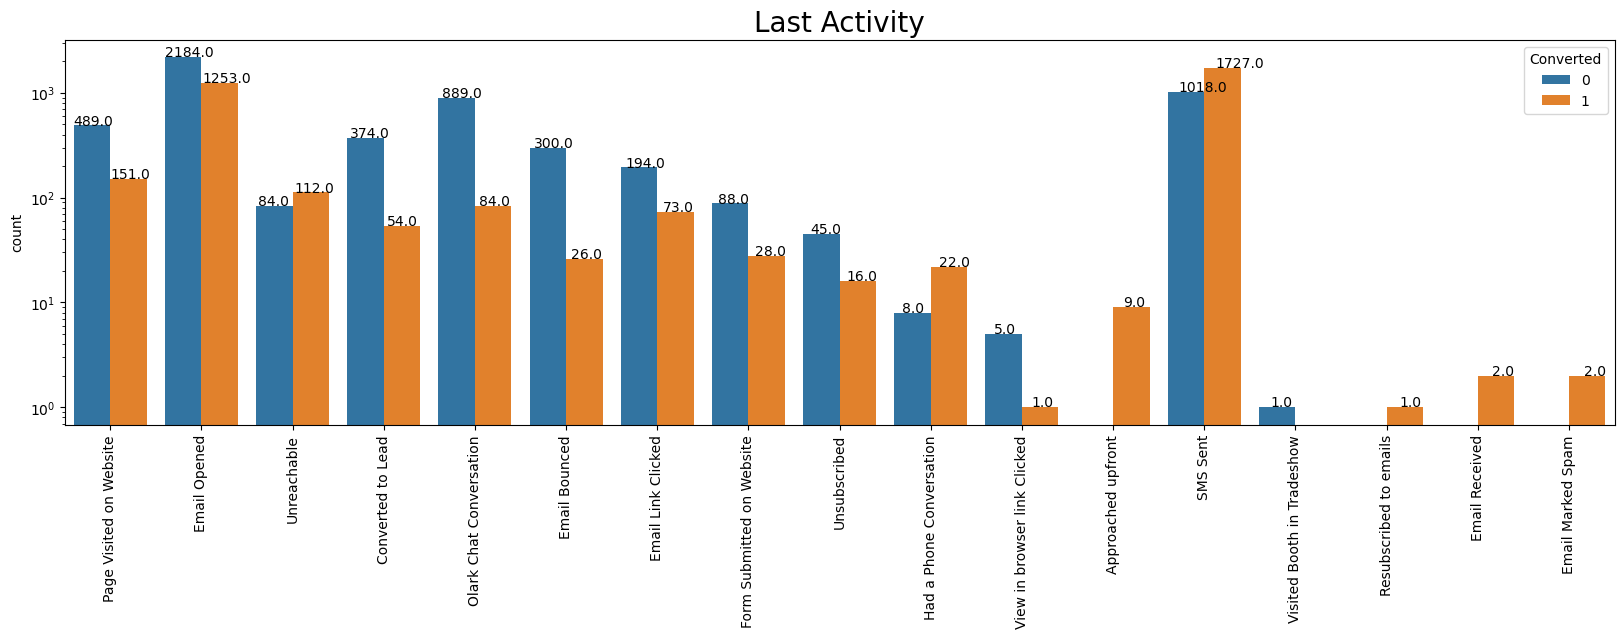

In [130]:
plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [131]:
#sms sent is the clear winner here in terms of absolute numbers as well as percentage of conversion

In [132]:
# The column Seems to add no quantative value as only sms is something to be priortise ,so let's drop the column

In [133]:
df_lead=df_lead.drop('Last Notable Activity',axis=1)

In [134]:
# Now lets Analyse the current occupation column

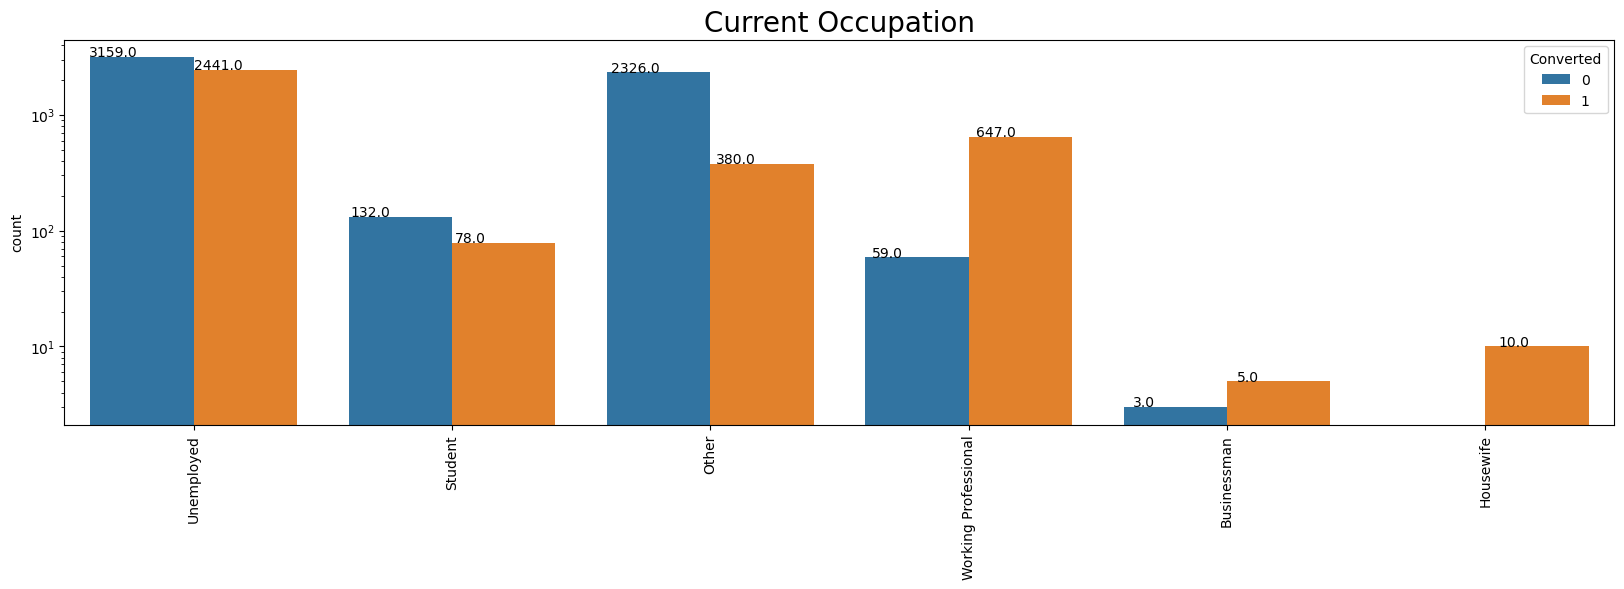

In [135]:
plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [136]:
# Unemployed has the highest absolute numbers
#Working Professional has the conversion rate

In [137]:
#Now let's check the Specialization Column

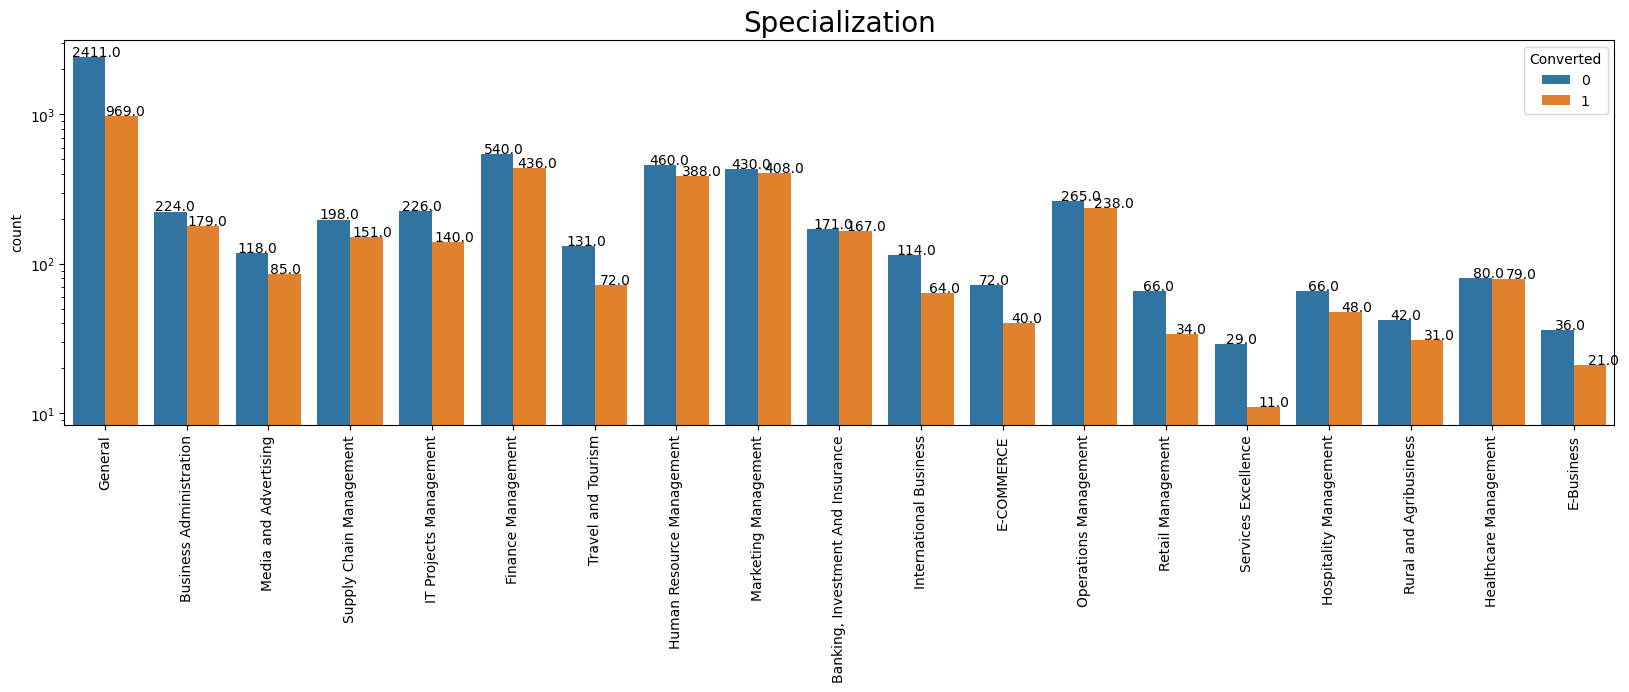

In [138]:
plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [139]:
# conversion rates are pretty evenly panned out in all specialization barring a few such as general

In [140]:
# Now let's check A free copy of Mastering The Interview

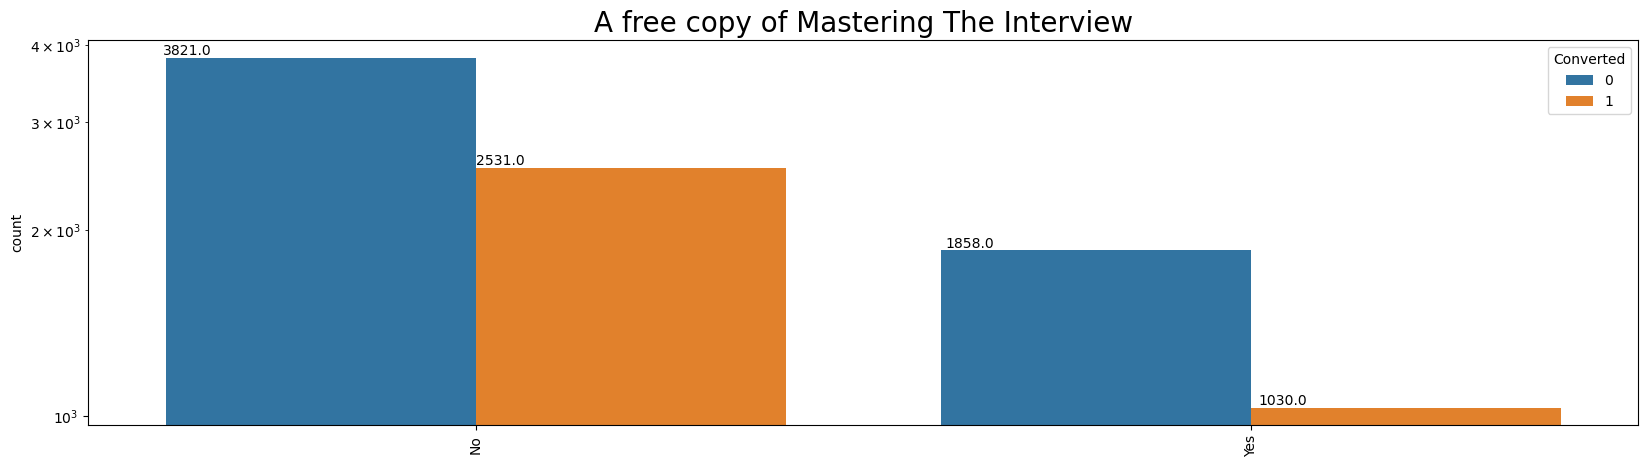

In [141]:
plt.figure(figsize = (20,5))

ax=sns.countplot(x ="A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('A free copy of Mastering The Interview',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [142]:
# It can be inferred that people who got the A free copy of Mastering The Interview less likely to convert.

In [143]:
# Now lets analyse the numerical variables

In [144]:
#Lets start with Total Visit.

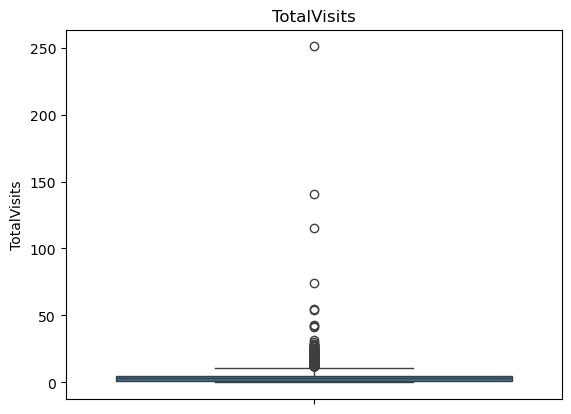

In [145]:
sns.boxplot(df_lead['TotalVisits']).set_title('TotalVisits')
plt.show()

In [146]:
# It's very difficult to figure out any thing from the above figure
#let's try to find the percentiles

In [147]:
df_lead['TotalVisits'].quantile([0,0.5,0.75,0.90,0.95,0.99,0.999,1])

0.000      0.000
0.500      3.000
0.750      5.000
0.900      7.000
0.950     10.000
0.990     17.000
0.999     31.522
1.000    251.000
Name: TotalVisits, dtype: float64

In [148]:
# It seems a better idea to cap the variable to 99 percent 

In [149]:
df_lead=df_lead[(df_lead.TotalVisits <=df_lead['TotalVisits'].quantile(0.99))]

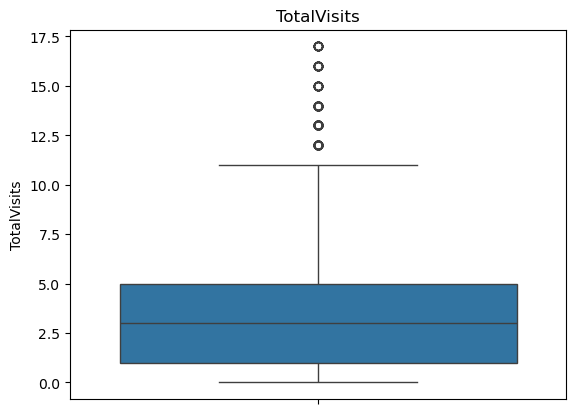

In [150]:
sns.boxplot(df_lead['TotalVisits']).set_title('TotalVisits')
plt.show()

In [151]:
# now let's check for Total Time Spent on Website'

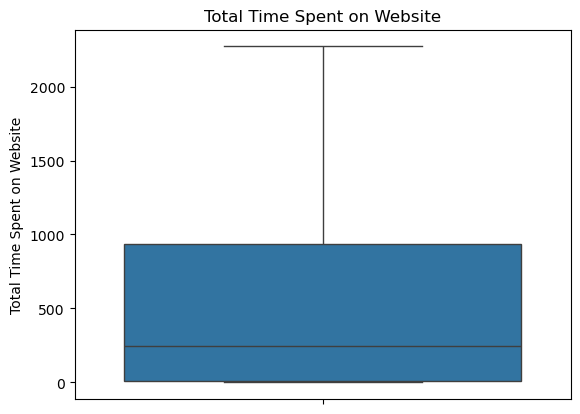

In [152]:
sns.boxplot(df_lead['Total Time Spent on Website']).set_title('Total Time Spent on Website')
plt.show()

In [153]:
df_lead['Total Time Spent on Website'].quantile([0,0.5,0.75,0.90,0.95,0.99,0.999,1])

0.000       0.00
0.500     247.00
0.750     933.00
0.900    1379.00
0.950    1559.40
0.990    1839.44
0.999    2116.22
1.000    2272.00
Name: Total Time Spent on Website, dtype: float64

In [154]:
# The median is around 250 and close to 50% of the values are under 250 there is no need of outlier treatment

In [155]:
# Now let's check for Page Views Per Visit

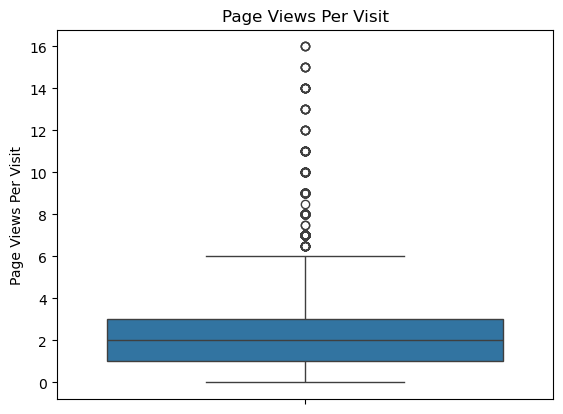

In [156]:
sns.boxplot(df_lead['Page Views Per Visit']).set_title('Page Views Per Visit')
plt.show()

In [157]:
df_lead['Page Views Per Visit'].quantile([0,0.5,0.75,0.90,0.95,0.99,0.999,1])

0.000     0.0
0.500     2.0
0.750     3.0
0.900     5.0
0.950     6.0
0.990     9.0
0.999    14.0
1.000    16.0
Name: Page Views Per Visit, dtype: float64

In [158]:
# here also we dont need outlier treatment as the data is well within 5 page views per vist
#for 90% of users ,with am median of 2 and few views more than 10

Bivariate Analysis

In [159]:
# lets checkout the  corelation  between the variables

In [160]:
df_lead[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()

Converted  TotalVisits  \
Converted                     1.000000     0.045402   
TotalVisits                   0.045402     1.000000   
Total Time Spent on Website   0.361979     0.345399   
Page Views Per Visit         -0.003569     0.740058   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                       0.361979             -0.003569  
TotalVisits                                     0.345399              0.740058  
Total Time Spent on Website                     1.000000              0.329966  
Page Views Per Visit                            0.329966              1.000000

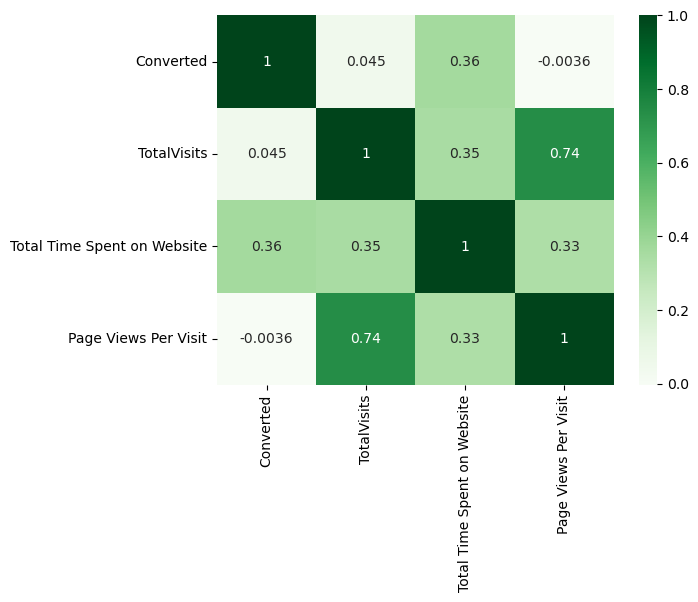

In [161]:
sns.heatmap(df_lead[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),annot=True,cmap='Greens')
plt.show()

In [162]:
# we can see that total timpe spent is good predictor of coversion rate.

Data Preparation

In [163]:
#Now let's create some dummy variables for Do Not Email','A free copy of Mastering The Interview'

In [164]:


df_lead[['Do Not Email']] = df_lead[['Do Not Email']].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [165]:
df_lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  General   
1             Email Opened                  General   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  General   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [166]:
df_lead[['A free copy of Mastering The Interview']] = df_lead[['A free copy of Mastering The Interview']].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [167]:
df_lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  General   
1             Email Opened                  General   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  General   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

In [168]:
# let's create categorical columns :-
categorical= df_lead.select_dtypes(include=['object']).columns
categorical

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [169]:
#Now let's create the dummy variables for the categorical variables

In [170]:
dummy =pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation', 'Specialization']], drop_first=True,dtype=int)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                      0                   0                       1  ...   
1                      0                   0                       0  ...   
2                      0                   0                       0  ...   
3                      0                   0                       0  ...   
4                      0                   0                       0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2            

In [171]:
#Now let's concat the two dataframes

In [172]:
df_lead= pd.concat([dummy,df_lead],axis = 1)

In [173]:
df_lead.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                      0                   0                       1  ...   
1                      0                   0                       0  ...   
2                      0                   0                       0  ...   
3                      0                   0                       0  ...   
4                      0                   0                       0  ...   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization  What is your current occupation  \
0                  General                       Unemployed   
1                  General                       Unemployed   
2  Business Administration                          Student   
3    Media and Advertising                       Unemployed   
4                  General                       Unemployed   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0  

[5 rows x 73 columns]

In [174]:
# lets now delete the redundant columns

In [175]:
df_lead=df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization'],axis=1)

In [176]:
df_lead.shape

(9157, 68)

In [177]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9157 non-null   int32  
 1   Lead Origin_Lead Add Form                             9157 non-null   int32  
 2   Lead Origin_Lead Import                               9157 non-null   int32  
 3   Lead Origin_Quick Add Form                            9157 non-null   int32  
 4   Lead Source_Direct Traffic                            9157 non-null   int32  
 5   Lead Source_Facebook                                  9157 non-null   int32  
 6   Lead Source_Google                                    9157 non-null   int32  
 7   Lead Source_Live Chat                                 9157 non-null   int32  
 8   Lead Source_NC_EDM                                    9157 non-

In [178]:
# Now let's start with train and test split.

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X= df_lead.drop(['Converted'], axis=1)

In [181]:
X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                      0                   0                       1  ...   
1                      0                   0                       0  ...   
2                      0                   0                       0  ...   
3                      0                   0                       0  ...   
4                      0                   0                       0  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Do Not Email  TotalVisits  \
0                                  0             0          0.0   
1                                  0             0          5.0   
2                                  0             0          2.0   
3                                  0             0          1.0   
4                                  0             0          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0  

[5 rows x 67 columns]

In [182]:
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [183]:
# let's split train and test data into 70:30 ratio

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [185]:
X_train.shape

(6409, 67)

In [186]:
X_test.shape

(2748, 67)

In [187]:
# as we have already seen that the variables vary greatly in magnitude ,so we will go for feature scaling

Feature Scaling

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6490                                    0                          0   
4026                                    0                          0   
6453                                    1                          0   
8949                                    1                          0   
6467                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
6490                        0                           0   
4026                        0                           0   
6453                        0                           0   
8949                        0                           0   
6467                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
6490                           0                     0                   1   
4026                           0                     0                   1   
6453                           1                     0                   0   
8949                           0                     0                   1   
6467                           0                     0                   1   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
6490                      0                   0                       0  ...   
4026                      0                   0                       0  ...   
6453                      0                   0                       0  ...   
8949                      0                   0                       0  ...   
6467                      0                   0                       0  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
6490                                 0                                      0   
4026                                 0                                      0   
6453                                 0                                      0   
8949                                 0                                      0   
6467                                 0                                      0   

      Specialization_Services Excellence  \
6490                                   0   
4026                                   0   
6453                                   0   
8949                                   0   
6467                                   0   

      Specialization_Supply Chain Management  \
6490                                       0   
4026                                       0   
6453                                       1   
8949                                       1   
6467                                       0   

      Specialization_Travel and Tourism  Do Not Email  TotalVisits  \
6490                                  0             0    -0.746653   
4026                                  0             1    -0.071773   
6453                                  0             0     2.965189   
8949                                  0             0     0.940548   
6467                                  0             0     2.627749   

      Total Time Spent on Website  Page Views Per Visit  \
6490                    -0.831303             -0.647913   
4026                    -0.578290             -0.405762   
6453                    -0.130933              1.773595   
8949                    -0.594791             -0.405762   
6467                    -0.767133              4.195103   

      A free copy of Mastering The Interview  
6490                                       0  
4026                                       0  
6453                                       1  
8949                                       0  
6467                                       1  

[5 rows x 67 columns]

In [190]:
# Now lets checkout the colinearity matrix and checkout which vairiables are highly corelated.

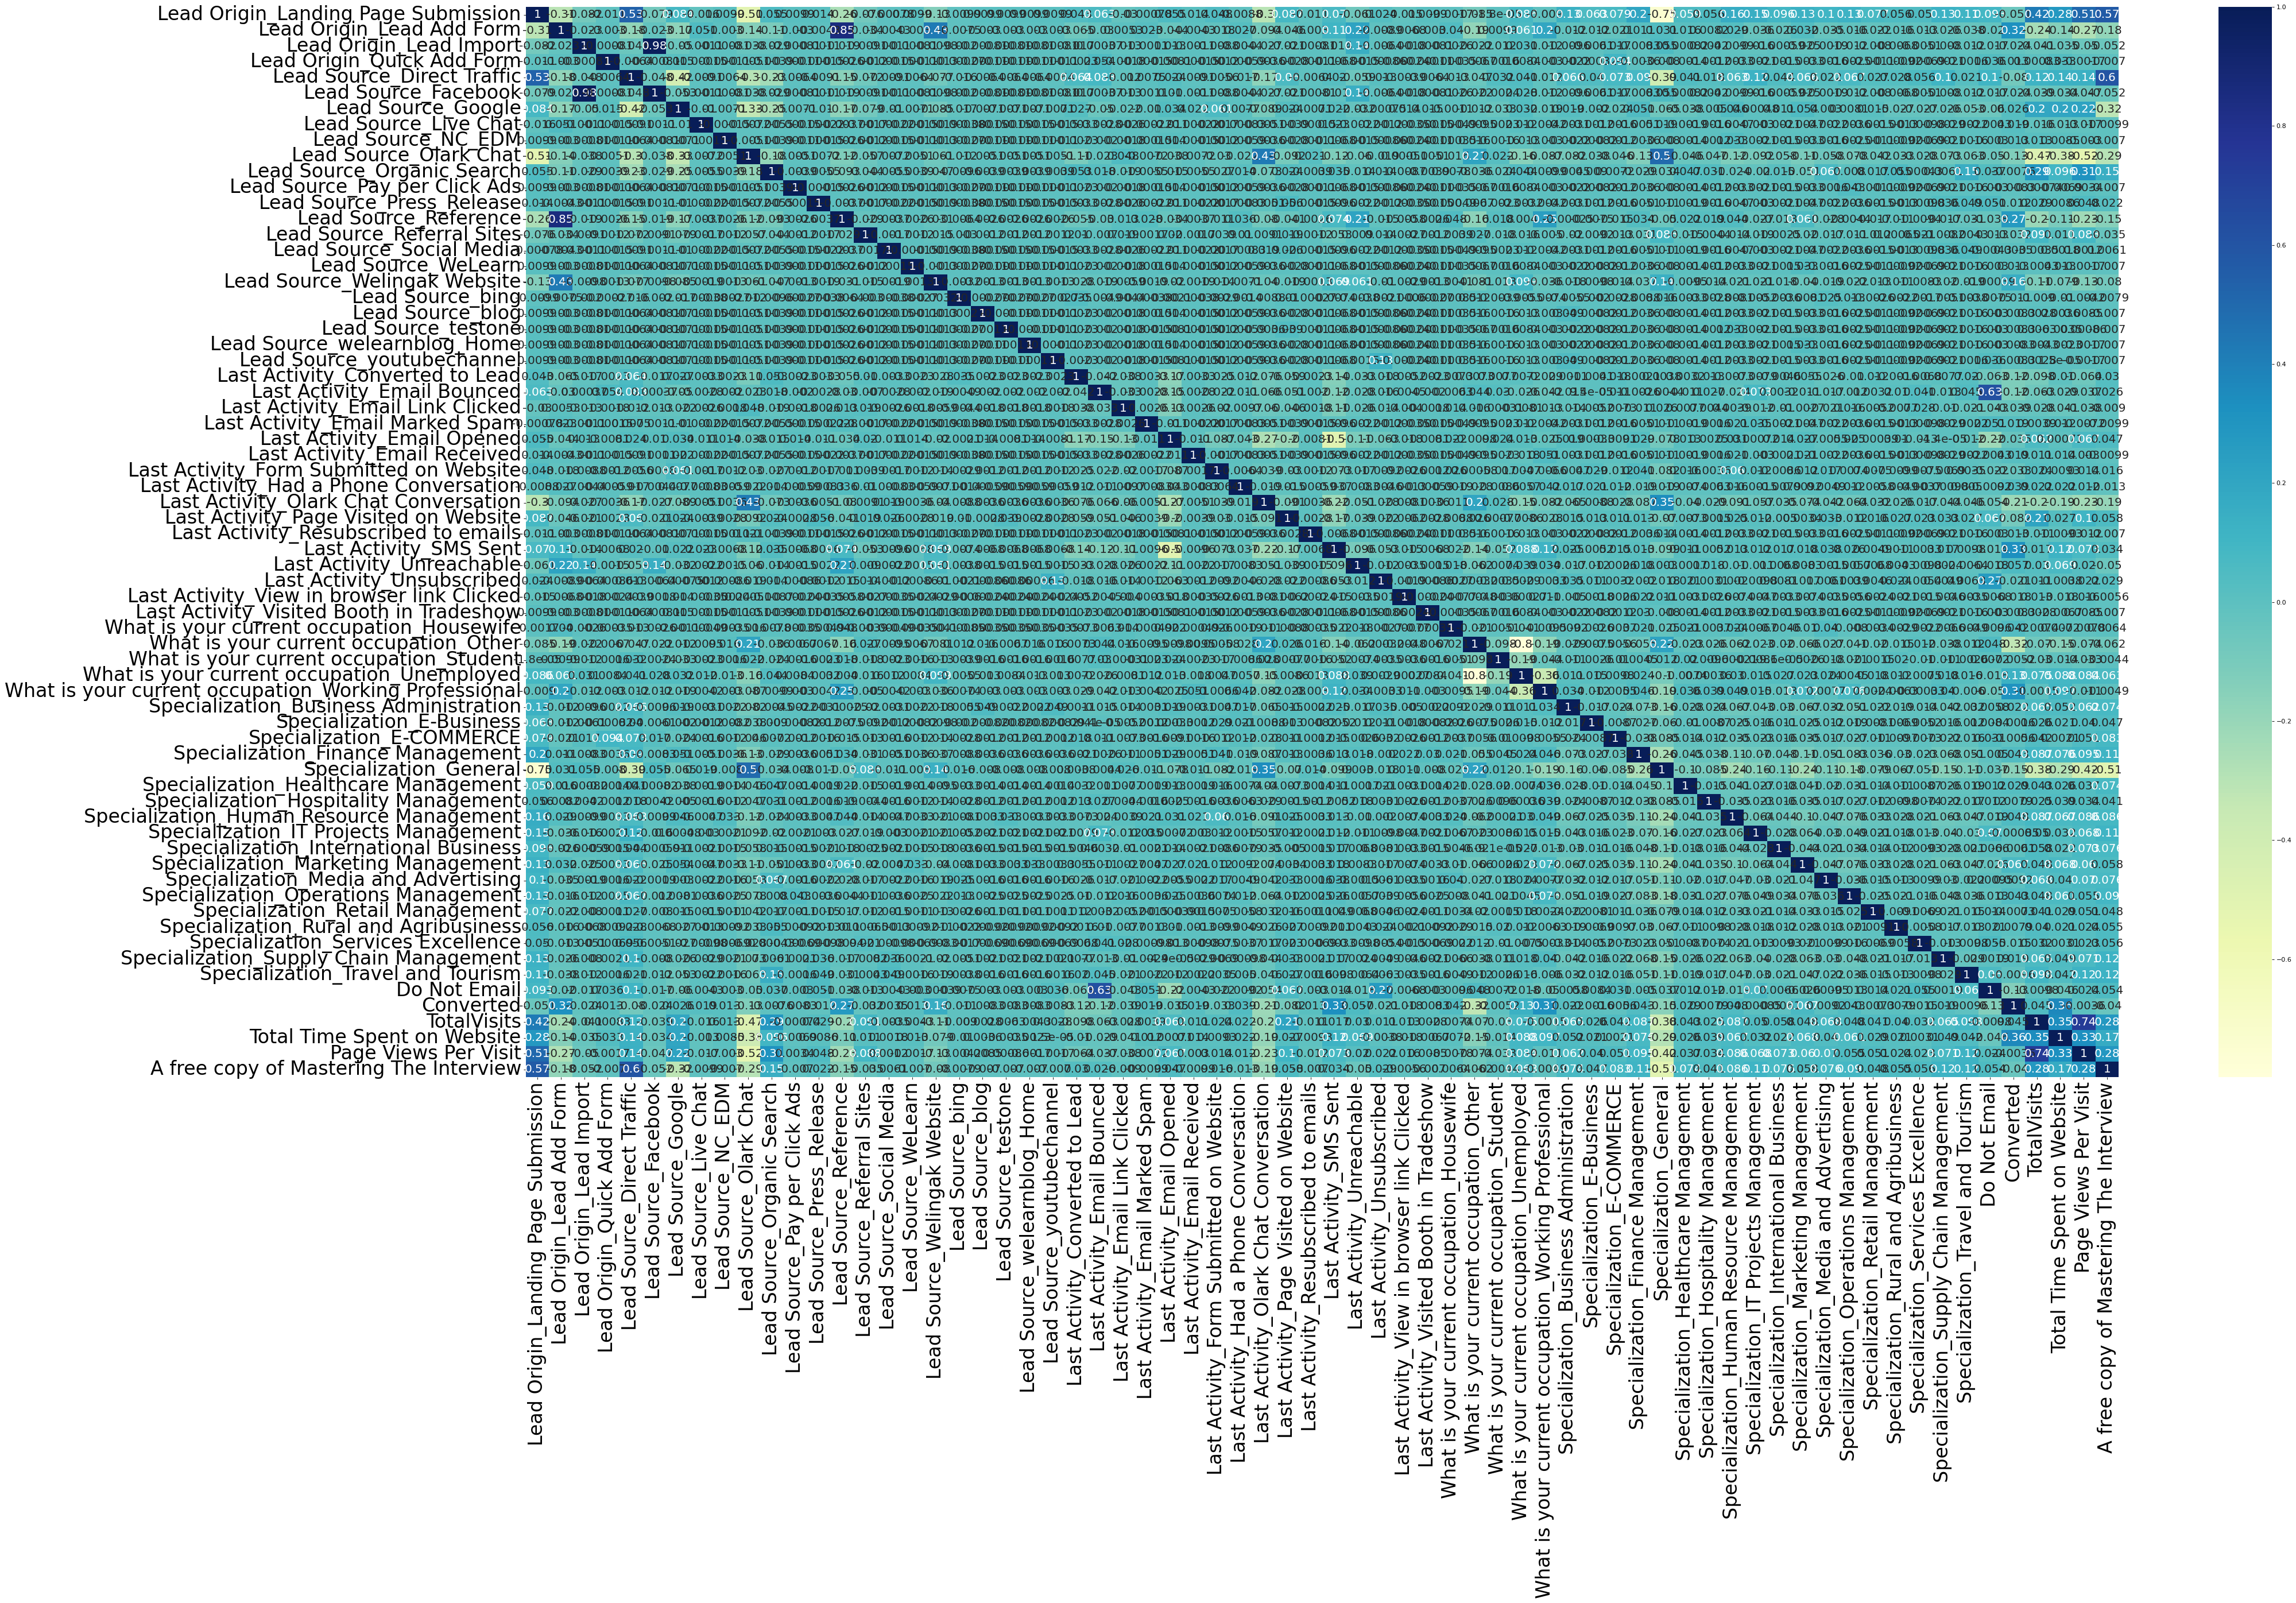

In [191]:
plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(df_lead.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

In [192]:
# let's check out some of the highly corelerated variables 
#'TotalVisits' and 'Page Views Per Visit' having correlation of 0.74
# howerver we can see there are plenty of variables  and it's better to use RFE feature first to eliminate the correlated variables.
# we will use rFE features to get top 15 variables then we will go for manual intervention.

Model Building

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
rfe =RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [195]:
# lets now check the variables selected by RFE

chosen_variables = X_train.columns[rfe.support_]
print(chosen_variables)

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Specialization_General', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')


In [196]:
# lets create the training data frame with chosen variables 
X_train_rfe=X_train[chosen_variables]

In [197]:
# lets now calculate the VIF for all the chosen variables.

In [198]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
12                             Specialization_General  2.26
2                              Lead Source_Olark Chat  2.07
0                 Lead Origin_Landing Page Submission  1.73
10              What is your current occupation_Other  1.60
8                              Last Activity_SMS Sent  1.54
1                           Lead Origin_Lead Add Form  1.47
7               Last Activity_Olark Chat Conversation  1.47
3                        Lead Source_Welingak Website  1.27
14                        Total Time Spent on Website  1.26
11  What is your current occupation_Working Profes...  1.20
13                                       Do Not Email  1.12
4                     Last Activity_Converted to Lead  1.10
5             Last Activity_Form Submitted on Website  1.02
6              Last Activity_Had a Phone Conversation  1.01
9           What is your current occupation_Housewife  1.01

In [199]:
# Now lets start building our model

Model 1

In [200]:
#build the model with all variables
X_train_sm=sm.add_constant(X_train_rfe)

lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     325.2
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:05   Log-Likelihood:                -2666.3
No. Observations:                6409   AIC:                             5365.
Df Residuals:                    6393   BIC:                             5473.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4393      0.017     25.563      0.000       0.406       0.473
Lead Origin_Landing Page Submission                     -0.1419      0.017     -8.279      0.000      -0.176      -0.108
Lead Origin_Lead Add Form                                0.4139      0.023     17.720      0.000       0.368       0.460
Lead Source_Olark Chat                                   0.1870      0.016     11.599      0.000       0.155       0.219
Lead Source_Welingak Website                             0.2631      0.044      5.934      0.000       0.176       0.350
Last Activity_Converted to Lead                         -0.1415      0.022     -6.316      0.000      -0.185      -0.098
Last Activity_Form Submitted on Website                 -0.1119      0.041     -2.712      0.007      -0.193      -0.031
Last Activity_Had a Phone Conversation                   0.1975      0.081      2.452      0.014       0.040       0.355
Last Activity_Olark Chat Conversation                   -0.1593      0.017     -9.140      0.000      -0.193      -0.125
Last Activity_SMS Sent                                   0.2106      0.011     19.886      0.000       0.190       0.231
What is your current occupation_Housewife                0.3688      0.139      2.646      0.008       0.096       0.642
What is your current occupation_Other                   -0.1721      0.011    -15.927      0.000      -0.193      -0.151
What is your current occupation_Working Professional     0.2721      0.018     14.743      0.000       0.236       0.308
Specialization_General                                  -0.1261      0.016     -7.646      0.000      -0.158      -0.094
Do Not Email                                            -0.1559      0.017     -9.184      0.000      -0.189      -0.123
Total Time Spent on Website                              0.1826      0.005     35.142      0.000       0.172       0.193
==============================================================================
Omnibus:                       89.032   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.337
Skew:                           0.271   Prob(JB):                     3.99e-20
Kurtosis:                       2.800   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
# scince we can see that all the VIFs for all the variables is lees than 5
# and the P values is also significat
# still we can eliminate "Last Activity_Had a Phone Conversation" having the highest p value

In [202]:
X_train_rfe_1 = X_train_rfe.drop(['Last Activity_Had a Phone Conversation'], axis = 1)
X_train_rfe_1.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Specialization_General', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [203]:
# lets calculate the new VIF

vif_1=pd.DataFrame()
vif_1['Features']=X_train_rfe_1.columns
vif_1['VIF']=[variance_inflation_factor(X_train_rfe_1.values,i) for i in range(X_train_rfe_1.shape[1])]
vif_1['VIF']=round(vif_1['VIF'],2)
vif_1=vif_1.sort_values(by='VIF',ascending=False)
vif_1

Features   VIF
11                             Specialization_General  2.26
2                              Lead Source_Olark Chat  2.07
0                 Lead Origin_Landing Page Submission  1.72
9               What is your current occupation_Other  1.60
7                              Last Activity_SMS Sent  1.54
1                           Lead Origin_Lead Add Form  1.47
6               Last Activity_Olark Chat Conversation  1.47
3                        Lead Source_Welingak Website  1.27
13                        Total Time Spent on Website  1.26
10  What is your current occupation_Working Profes...  1.19
12                                       Do Not Email  1.12
4                     Last Activity_Converted to Lead  1.10
5             Last Activity_Form Submitted on Website  1.02
8           What is your current occupation_Housewife  1.01

In [204]:
#let's now  build the 2nd model

Model 2

In [205]:
#build the model with all variables
X_train_sm=sm.add_constant(X_train_rfe_1)

lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     347.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:05   Log-Likelihood:                -2669.3
No. Observations:                6409   AIC:                             5369.
Df Residuals:                    6394   BIC:                             5470.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4411      0.017     25.678      0.000       0.407       0.475
Lead Origin_Landing Page Submission                     -0.1425      0.017     -8.310      0.000      -0.176      -0.109
Lead Origin_Lead Add Form                                0.4152      0.023     17.775      0.000       0.369       0.461
Lead Source_Olark Chat                                   0.1867      0.016     11.576      0.000       0.155       0.218
Lead Source_Welingak Website                             0.2613      0.044      5.892      0.000       0.174       0.348
Last Activity_Converted to Lead                         -0.1427      0.022     -6.365      0.000      -0.187      -0.099
Last Activity_Form Submitted on Website                 -0.1132      0.041     -2.743      0.006      -0.194      -0.032
Last Activity_Olark Chat Conversation                   -0.1601      0.017     -9.184      0.000      -0.194      -0.126
Last Activity_SMS Sent                                   0.2092      0.011     19.774      0.000       0.188       0.230
What is your current occupation_Housewife                0.3668      0.139      2.631      0.009       0.093       0.640
What is your current occupation_Other                   -0.1724      0.011    -15.949      0.000      -0.194      -0.151
What is your current occupation_Working Professional     0.2730      0.018     14.790      0.000       0.237       0.309
Specialization_General                                  -0.1266      0.016     -7.675      0.000      -0.159      -0.094
Do Not Email                                            -0.1566      0.017     -9.222      0.000      -0.190      -0.123
Total Time Spent on Website                              0.1827      0.005     35.168      0.000       0.173       0.193
==============================================================================
Omnibus:                       96.121   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.825
Skew:                           0.279   Prob(JB):                     1.56e-21
Kurtosis:                       2.780   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
# In model 2 we can see that all variables have VIF<5 and P value<0.05
#However we can still drop the feature with highest p value i.e. 'What is your current occupation_Housewife'

In [207]:
X_train_rfe_2 = X_train_rfe_1.drop(['What is your current occupation_Housewife'], axis = 1)
X_train_rfe_2.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Specialization_General', 'Do Not Email',
       'Total Time Spent on Website'],
      dtype='object')

In [208]:
# lets now calculate the new VIF
vif_2=pd.DataFrame()
vif_2['Features']=X_train_rfe_2.columns
vif_2['VIF']=[variance_inflation_factor(X_train_rfe_2.values,i) for i in range(X_train_rfe_2.shape[1])]
vif_2['VIF']=round(vif_2['VIF'],2)
vif_2=vif_2.sort_values(by='VIF',ascending=False)
vif_2

Features   VIF
10                             Specialization_General  2.26
2                              Lead Source_Olark Chat  2.07
0                 Lead Origin_Landing Page Submission  1.72
8               What is your current occupation_Other  1.60
7                              Last Activity_SMS Sent  1.54
6               Last Activity_Olark Chat Conversation  1.47
1                           Lead Origin_Lead Add Form  1.46
3                        Lead Source_Welingak Website  1.27
12                        Total Time Spent on Website  1.26
9   What is your current occupation_Working Profes...  1.19
11                                       Do Not Email  1.12
4                     Last Activity_Converted to Lead  1.10
5             Last Activity_Form Submitted on Website  1.02

In [209]:
# Now lets build model number 3

Model 3

In [210]:
#build the model with all variables
X_train_sm=sm.add_constant(X_train_rfe_2)

lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     373.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:06   Log-Likelihood:                -2672.8
No. Observations:                6409   AIC:                             5374.
Df Residuals:                    6395   BIC:                             5468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4426      0.017     25.771      0.000       0.409       0.476
Lead Origin_Landing Page Submission                     -0.1433      0.017     -8.355      0.000      -0.177      -0.110
Lead Origin_Lead Add Form                                0.4177      0.023     17.886      0.000       0.372       0.463
Lead Source_Olark Chat                                   0.1868      0.016     11.574      0.000       0.155       0.218
Lead Source_Welingak Website                             0.2589      0.044      5.835      0.000       0.172       0.346
Last Activity_Converted to Lead                         -0.1431      0.022     -6.381      0.000      -0.187      -0.099
Last Activity_Form Submitted on Website                 -0.1095      0.041     -2.655      0.008      -0.190      -0.029
Last Activity_Olark Chat Conversation                   -0.1603      0.017     -9.189      0.000      -0.194      -0.126
Last Activity_SMS Sent                                   0.2084      0.011     19.702      0.000       0.188       0.229
What is your current occupation_Other                   -0.1727      0.011    -15.972      0.000      -0.194      -0.152
What is your current occupation_Working Professional     0.2716      0.018     14.711      0.000       0.235       0.308
Specialization_General                                  -0.1277      0.016     -7.743      0.000      -0.160      -0.095
Do Not Email                                            -0.1570      0.017     -9.237      0.000      -0.190      -0.124
Total Time Spent on Website                              0.1830      0.005     35.213      0.000       0.173       0.193
==============================================================================
Omnibus:                       94.910   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.455
Skew:                           0.276   Prob(JB):                     3.09e-21
Kurtosis:                       2.779   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
#As we can see all the features have p values <0.05 and VIF<5,we can go fruther and drop further feature
#but that would be overkill,so we will select model 3 as our final model

Making prediction on 'train' dataset based on final model

In [212]:
y_train_pred = lr_model.predict(X_train_sm)

In [213]:
y_train_pred.head()

6490    0.019667
4026    0.260517
6453    0.483765
8949    0.190443
6467    0.367322
dtype: float64

In [214]:
y_train_pred = y_train_pred.values.reshape(-1)

In [215]:
y_train_pred[:5]

array([0.01966715, 0.26051721, 0.48376454, 0.19044313, 0.36732199])

Creating Dataframe with conversion,probability

In [219]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [220]:
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID
0          0         0.019667         6490
1          1         0.260517         4026
2          1         0.483765         6453
3          1         0.190443         8949
4          0         0.367322         6467

OPtimal Cutoff Point

In [221]:
# Let's create columns with different probability cutoffs

In [223]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

In [224]:
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.019667         6490    1    0    0    0    0    0    0   
1          1         0.260517         4026    1    1    1    0    0    0    0   
2          1         0.483765         6453    1    1    1    1    1    0    0   
3          1         0.190443         8949    1    1    0    0    0    0    0   
4          0         0.367322         6467    1    1    1    1    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [225]:
#Let's now create the confusion matrix

In [227]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [228]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [229]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.448900     0.999194     0.101553
0.1          0.1  0.575129     0.986694     0.315347
0.2          0.2  0.707131     0.952823     0.552049
0.3          0.3  0.777344     0.910484     0.693306
0.4          0.4  0.812763     0.808871     0.815220
0.5          0.5  0.817600     0.699597     0.892084
0.6          0.6  0.787018     0.547581     0.938152
0.7          0.7  0.745358     0.395968     0.965895
0.8          0.8  0.712904     0.283871     0.983711
0.9          0.9  0.681698     0.190323     0.991855


In [230]:
#Now lets plot the same to get the optimal point

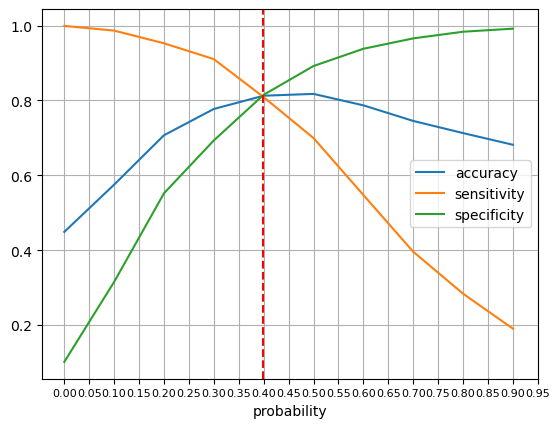

In [240]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.398, color='r', linestyle='--')
plt.grid()
plt.show()

In [241]:
#So the optimal cutoff is 0.398

In [242]:
# Now Let's Calculate'final_predicted' based on 'Conversion_Prob' using 0.398 cutoff point:-
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.398 else 0)

In [243]:
#Lets drop the unnecessary columns

In [244]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)

In [245]:
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  final_predicted
0          0         0.019667         6490                0
1          1         0.260517         4026                0
2          1         0.483765         6453                1
3          1         0.190443         8949                0
4          0         0.367322         6467                0

In [246]:
#Now let's assign lead score

In [247]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [248]:
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  final_predicted  Lead_Score
0          0         0.019667         6490                0           2
1          1         0.260517         4026                0          26
2          1         0.483765         6453                1          48
3          1         0.190443         8949                0          19
4          0         0.367322         6467                0          37

Model Evaluation

In [249]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3193  736]
 [ 469 2011]]


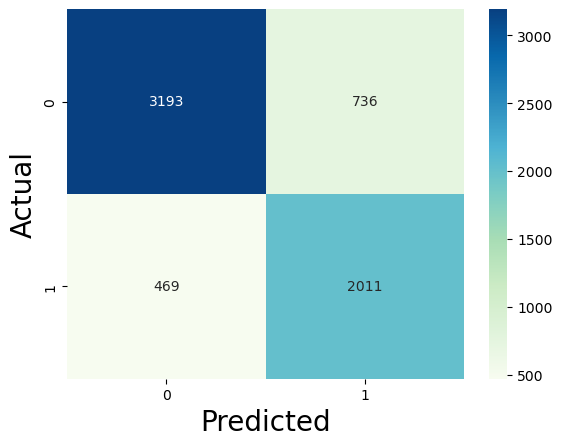

In [251]:
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [252]:
#let's check the overall accuracy

In [253]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8119831486971446

In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [255]:
#checking sensitivity

In [256]:
TP / float(TP+FN)

0.8108870967741936

In [257]:
#checking Specificity

In [258]:
TN / float(TN+FP)

0.8126749809111733

In [259]:
#False Postive Rate

In [260]:
print(FP/ float(TN+FP))

0.18732501908882668


In [261]:
#positive predictive value

In [262]:
print (TP / float(TP+FP))

0.7320713505642519


In [263]:
#Negative predictive value

In [264]:
print (TN / float(TN+ FN))

0.8719279082468596


Precision and Recall

In [265]:
#Precision TP / TP + FP

In [266]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7320713505642519

In [267]:
#Recall TP / TP + FN

In [268]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8108870967741936

so the values can be drafted as follows
Accuracy : 81%
Sensitivity : 10%
Specificity : 81%
Pricision3 72%
Recal1: 80%

ROC Curve

In [269]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [271]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

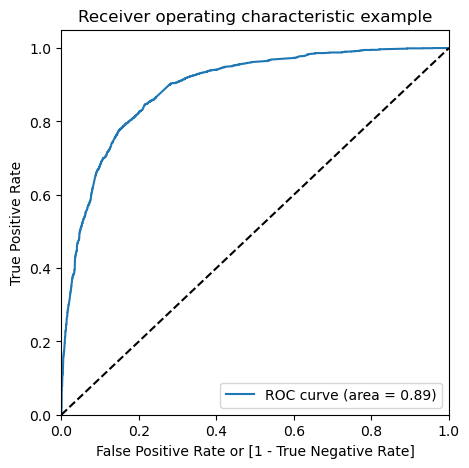

In [272]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [273]:
# ROC curve area is 0.89 ,which is a good predictor ,as it is close to 1

Precision and recall tradeoff

In [274]:
from sklearn.metrics import precision_recall_curve

In [275]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

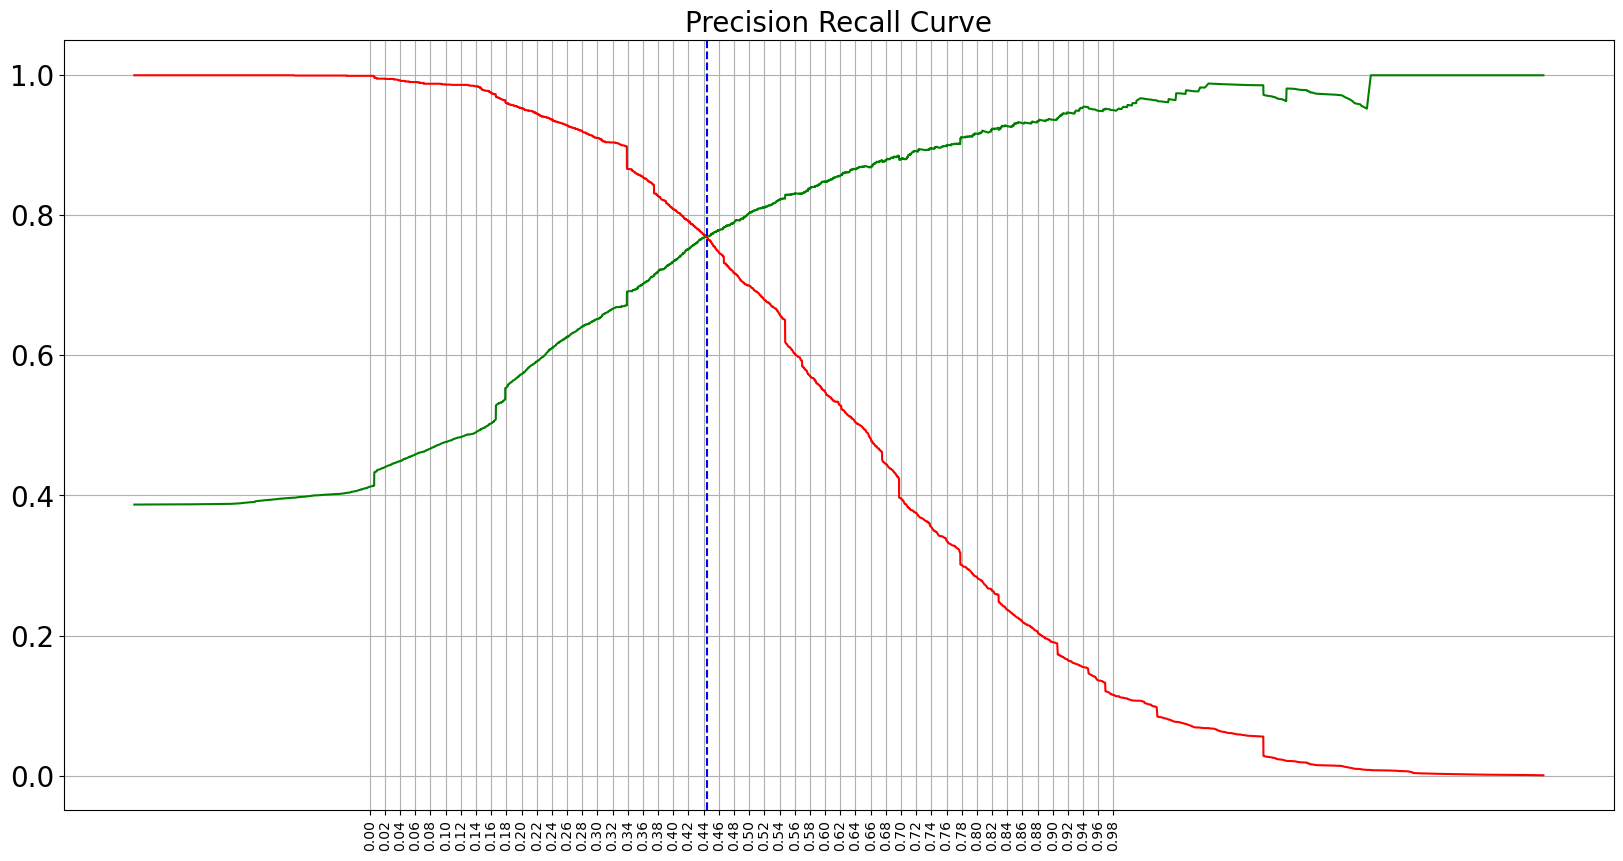

In [280]:
plt.figure(figsize=(20,10))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.445, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10.,rotation=90)
plt.yticks(size=20)
plt.grid()
plt.show()


In [281]:
#From above above 'precision_recall_curve' we can see that cutoff point is 0.445

In [283]:
# plotting the Train dataset again with 0.445 as cutoff:-
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.445 else 0)

In [284]:
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  final_predicted  Lead_Score  \
0          0         0.019667         6490                0           2   
1          1         0.260517         4026                0          26   
2          1         0.483765         6453                1          48   
3          1         0.190443         8949                0          19   
4          0         0.367322         6467                0          37   

   final_predicted_2  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

In [285]:
# Confusion matrix:-
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3361  568]
 [ 577 1903]]


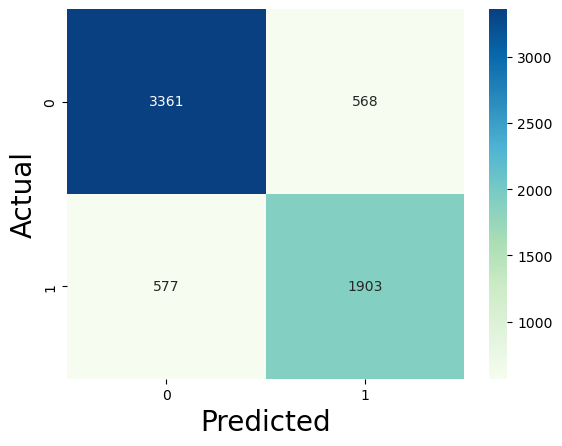

In [286]:
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [287]:
#Again we will check the Accuaracy,Sensitivity,Specificity,precision and recall

In [288]:
#Accuracy

In [289]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8213449836167889

In [290]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [291]:
#Sensitivity

In [292]:
TP / float(TP+FN)

0.7673387096774194

In [293]:
#Specificity

In [294]:
TN / float(TN+FP)

0.8554339526597099

In [295]:
# positive predictive value

In [296]:
print (TP / float(TP+FP))

0.7701335491703764


In [297]:
# Negative predictive value

In [298]:
print (TN / float(TN+ FN))

0.8534789233113256


In [299]:
# Pricision

In [300]:
confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7701335491703764

In [301]:
#Recall

In [302]:
confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7673387096774194

In [303]:
# we can see after using ROC curve ,Sensitivity and Recall has reduced to 77% from 81%
# so we will use our optimal cutoff point as 0.398 i9nstead of 0.445

Making predictions on the test set

In [304]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [305]:
test_col = X_train_sm.columns
X_test=X_test[test_col[1:]]
X_test = sm.add_constant(X_test)

In [306]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2748 entries, 7359 to 4744
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2748 non-null   float64
 1   Lead Origin_Landing Page Submission                   2748 non-null   int32  
 2   Lead Origin_Lead Add Form                             2748 non-null   int32  
 3   Lead Source_Olark Chat                                2748 non-null   int32  
 4   Lead Source_Welingak Website                          2748 non-null   int32  
 5   Last Activity_Converted to Lead                       2748 non-null   int32  
 6   Last Activity_Form Submitted on Website               2748 non-null   int32  
 7   Last Activity_Olark Chat Conversation                 2748 non-null   int32  
 8   Last Activity_SMS Sent                                2748 n

In [307]:
#Making Predictions

In [308]:
y_test_pred = lr_model.predict(X_test)

In [309]:
y_test_pred[:10]

7359    0.312713
2201    0.019428
2473    0.894337
8388    0.035957
2949    0.066158
8144    0.159906
8443    0.466533
290     0.005774
8626    0.385778
5709    0.360176
dtype: float64

In [311]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [312]:
y_pred_1.head()

0
7359  0.312713
2201  0.019428
2473  0.894337
8388  0.035957
2949  0.066158

In [313]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          0         7359  0.312713
1          0         2201  0.019428
2          1         2473  0.894337
3          0         8388  0.035957
4          0         2949  0.066158

In [314]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob']]
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob
0         7359          0         0.312713
1         2201          0         0.019428
2         2473          1         0.894337
3         8388          0         0.035957
4         2949          0         0.066158

In [316]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  Lead_Score
0         7359          0         0.312713          31
1         2201          0         0.019428           2
2         2473          1         0.894337          89
3         8388          0         0.035957           4
4         2949          0         0.066158           7

In [317]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.398

In [320]:
y_pred_final['final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.398 else 0)
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  Lead_Score  final_Predicted
0         7359          0         0.312713          31                0
1         2201          0         0.019428           2                0
2         2473          1         0.894337          89                1
3         8388          0         0.035957           4                0
4         2949          0         0.066158           7                0

Test model evaluation

In [321]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8002183406113537

In [322]:
#Confusion Matrix

In [323]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1363,  340],
       [ 209,  836]], dtype=int64)

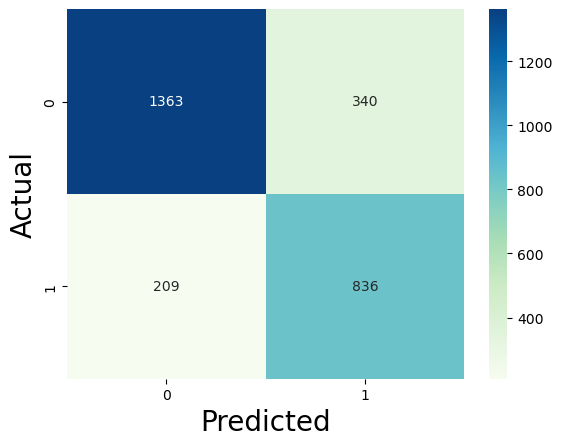

In [324]:
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [325]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [326]:
#sensitivity

In [328]:
TP / float(TP+FN)

0.8

In [329]:
#Specificity

In [330]:
TN / float(TN+FP)

0.8003523194362889

In [331]:
#positive predictive value

In [332]:
print (TP / float(TP+FP))

0.7108843537414966


In [333]:
#False Postive Rate

In [334]:
print(FP/ float(TN+FP))

0.1996476805637111


In [335]:
#Negative predictive value

In [336]:
print (TN / float(TN+ FN))

0.8670483460559797


Precision and Recall

In [337]:
from sklearn.metrics import precision_score, recall_score

In [338]:
#Precision

In [339]:
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7108843537414966

In [340]:
#Recall

In [341]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8

In [342]:
# Accuary and sensitivity of Train Set is 81% ,where as Accuary and sensitivity of Test Set is 80%
#So our model is performing quit well.

Determining top feature based on final model

In [343]:
pd.options.display.float_format = '{:.2f}'.format
lr_model.params[1:]

Lead Origin_Landing Page Submission                    -0.14
Lead Origin_Lead Add Form                               0.42
Lead Source_Olark Chat                                  0.19
Lead Source_Welingak Website                            0.26
Last Activity_Converted to Lead                        -0.14
Last Activity_Form Submitted on Website                -0.11
Last Activity_Olark Chat Conversation                  -0.16
Last Activity_SMS Sent                                  0.21
What is your current occupation_Other                  -0.17
What is your current occupation_Working Professional    0.27
Specialization_General                                 -0.13
Do Not Email                                           -0.16
Total Time Spent on Website                             0.18
dtype: float64

In [344]:
#converting coefficients w.r.t max coffcient
top_feature = lr_model.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission                    -34.32
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  44.72
Lead Source_Welingak Website                            61.98
Last Activity_Converted to Lead                        -34.26
Last Activity_Form Submitted on Website                -26.23
Last Activity_Olark Chat Conversation                  -38.37
Last Activity_SMS Sent                                  49.90
What is your current occupation_Other                  -41.36
What is your current occupation_Working Professional    65.02
Specialization_General                                 -30.59
Do Not Email                                           -37.58
Total Time Spent on Website                             43.82
dtype: float64

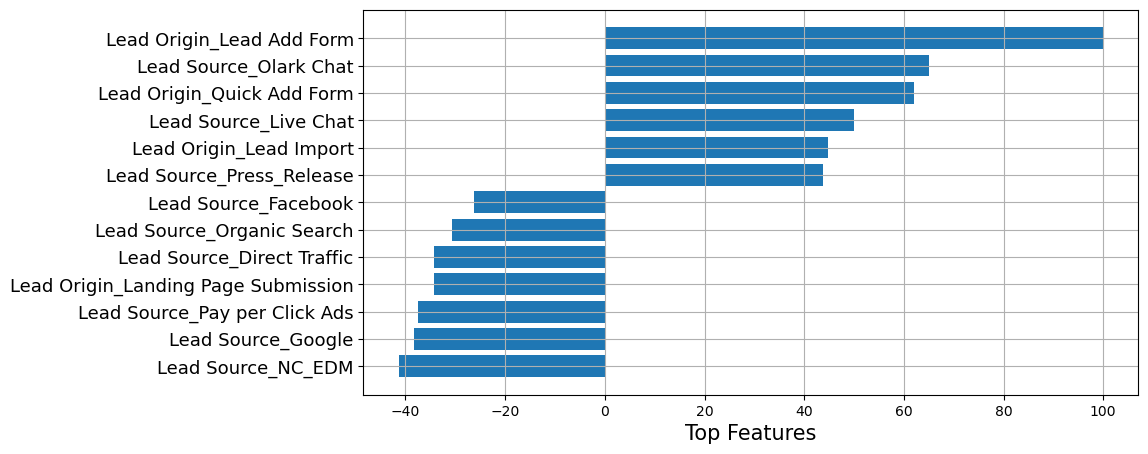

In [348]:
pos = np.arange(top_feature_sort.shape[0]) + .5
fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.grid()
plt.show()

In [349]:
#Now let's write down our final equaton

***Converted = 0.4426 + 0.42 X Lead Origin_Lead Add Form + 0.27 X What is your current occupation_Working Professional + 0.26 X Lead Source_Welingak Website + 0.21 X Last Activity_SMS Sent  + 0.19 X Lead Source_Olark Chat + 0.18 X Total Time Spent on Website -0.11 X Last Activity_Form Submitted on Website - 0.13 X Specialization_General - 0.14 X Lead Origin_Landing Page Submission - 0.14 X Last Activity_Converted to Lead - 0.16 X Last Activity_Olark Chat Conversation - 0.16 X Do Not Email***

Evaluation Metrics for the train Dataset:-

Accuracy :0180
Sensitiviy:~1.80
Specificity:0.81
Precision3 0.72
Recal1: 0.80
Evaluation Metrics for the test Dataset:-

Accuracy : 0.80
Sensitivity: ~ 0.80
Specificity: 0.80
Pr1cision: 0.72
Recall: 0.80
Recall: 0.80

**Recommendation**

1.Focus on the leads from Add form as they contribute most to conversion<br>
2.People who are working professionals should be ideal target<br>
3.Leads from Welingak website are convertible,so advertising revenue should be focused on this website.<br>
4.People who donot want to be mailed should be avoided.<br>
5.People with no specific specialization should be avoided.<br>